# Домашняя работа к восьмому семинару
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием **df**.
3. Выполните предварительную обработку данных, выполнив следующие шаги:

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

b. Проверьте и обработайте любые дублирующиеся строки в датасете.

c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

5. Выполните проектирование признаков путем реализации следующих преобразований:

a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Добавляем датасет
df = pd.read_csv('test.csv')
# Проверим содержимое первых пяти строк
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
# Посмотрим сводную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
# Количество недостающих значений
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [5]:
# Вычисляем долю пропущеных значений в каждом столбце
missing_ratio = df.isnull().sum() / len(df)
missing_ratio

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64

In [6]:
# Определяем порог, выше которого столбец будет удален
threshold = 0.5

In [7]:
# Находим столбцы, в которых доля пропущенных значений больше порога
columns_to_drop = missing_ratio[missing_ratio > threshold].index
print("Столбцы, которые будут удалены:")
columns_to_drop

Столбцы, которые будут удалены:


Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
# Удаляем столбцы с помощью метода drop
df = df.drop(columns_to_drop, axis=1)
print("Очищенный dataframe:")
df

Очищенный dataframe:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [9]:
# Добавляем датасет
price = pd.read_csv('sample_submission.csv')
# Проверим содержимое первых пяти строк
price.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [10]:
# Объединяем датасеты с ценой и остальными данными по Id
df = pd.merge(df, price, on='Id')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,183583.683570


<Axes: xlabel='SalePrice', ylabel='Count'>

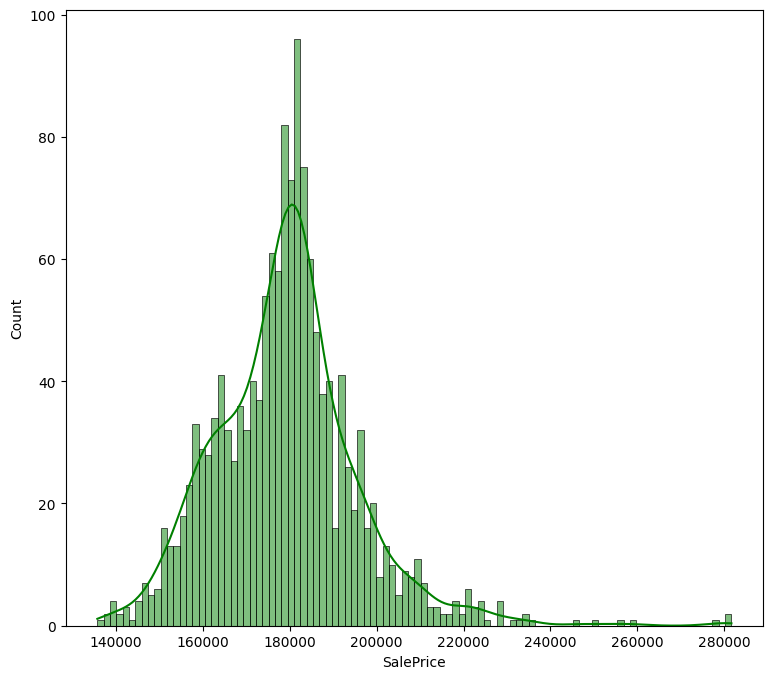

In [11]:
df['SalePrice'].describe()
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], color='g', bins=100, kde=True)

Теперь мы рассмотрим, как распределяются числовые характеристики. Для этого сначала перечислим все типы данных из нашего набора и выберем только числовые.

In [12]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [13]:
df_num = df.drop('Id', axis=1)
df_num = df_num.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,169277.052498
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,187758.393989
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,183583.683570
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,179317.477511
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,150730.079977


Посмотрим как распределены все числовые данные датасета

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

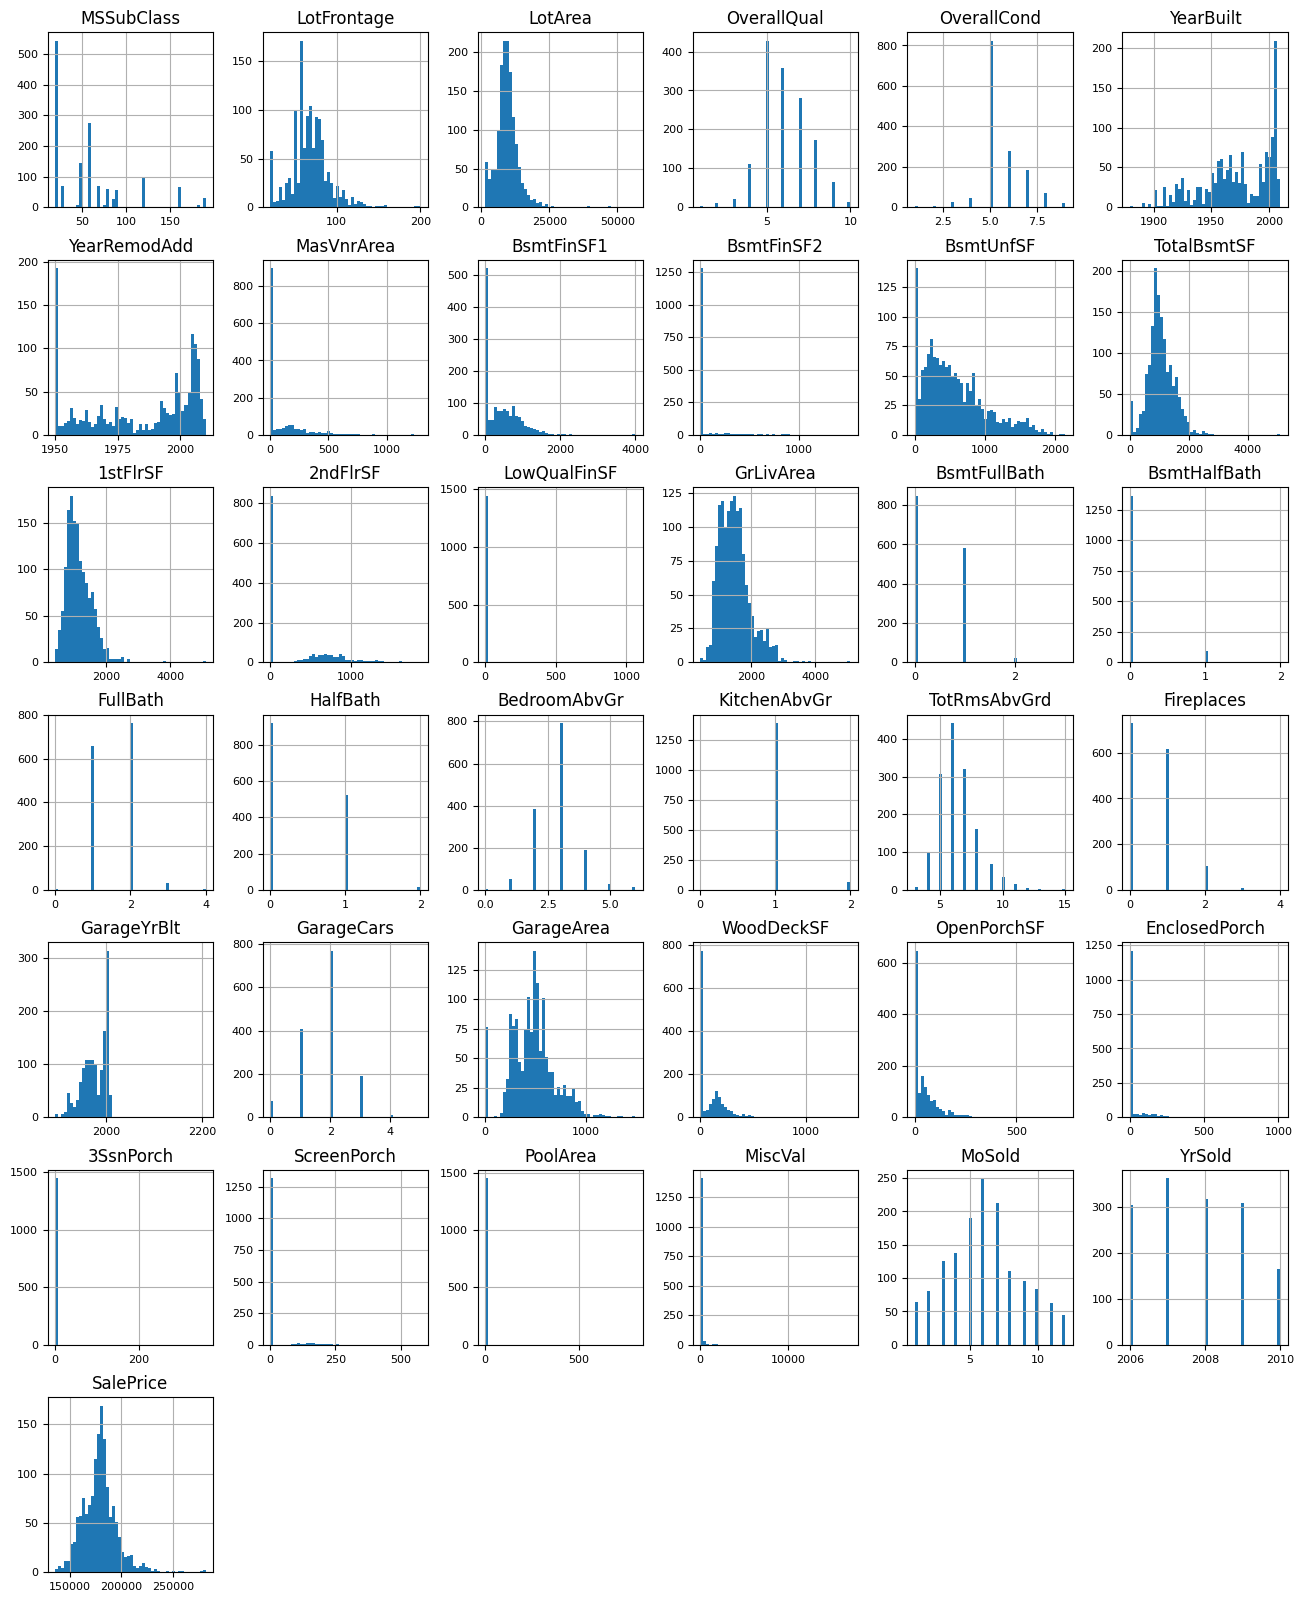

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
# Проверим ещё раз в каких столбцах отсутствуют данные
df_num.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

LotFrontage - Линейные футы улицы, ведущей к участку. Эти данные можно не принимать во внимание в данной работе, поэтому удалим столбец.

In [16]:
df = df.drop('LotFrontage', axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,184924.279659


In [17]:
# MasVnrArea: Площадь шпона каменной кладки в квадратных футах
df['MasVnrArea'].describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [18]:
# Данные имеют выброс. Удалим выброс, а недостающие значения заменим медианой
# Вычисляем границы выбросов с помощью межквартильного размаха
Q1 = df['MasVnrArea'].quantile(0.25) # первый квартиль
Q3 = df['MasVnrArea'].quantile(0.75) # третий квартиль
IQR = Q3 - Q1 # межквартильный размах
lower_bound = Q1 - 1.5 * IQR # нижняя граница выбросов
upper_bound = Q3 + 1.5 * IQR # верхняя граница выбросов
print("Границы выбросов для столбца", 'MasVnrArea', ":", lower_bound, "-", upper_bound)

# Удаляем выбросы с помощью метода drop
df = df.drop(df[(df['MasVnrArea'] < lower_bound) | (df['MasVnrArea'] > upper_bound)].index)
print("Датфрейм после удаления выбросов:")
print(df)

Границы выбросов для столбца MasVnrArea : -246.0 - 410.0
Датфрейм после удаления выбросов:
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0     1461          20       RH    11622   Pave      Reg         Lvl   
1     1462          20       RL    14267   Pave      IR1         Lvl   
2     1463          60       RL    13830   Pave      IR1         Lvl   
3     1464          60       RL     9978   Pave      IR1         Lvl   
4     1465         120       RL     5005   Pave      IR1         HLS   
...    ...         ...      ...      ...    ...      ...         ...   
1454  2915         160       RM     1936   Pave      Reg         Lvl   
1455  2916         160       RM     1894   Pave      Reg         Lvl   
1456  2917          20       RL    20000   Pave      Reg         Lvl   
1457  2918          85       RL    10441   Pave      Reg         Lvl   
1458  2919          60       RL     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... Encl

In [19]:
# Вычисляем медиану столбца
median = df['MasVnrArea'].median()
print("Медиана столбца", 'MasVnrArea', ":", median)

# Заменяем пропущенные значения на медиану с помощью метода fillna
df['MasVnrArea'] = df['MasVnrArea'].fillna(median)
print("Датфрейм после замены пропусков на медиану:")
print(df)

Медиана столбца MasVnrArea : 0.0
Датфрейм после замены пропусков на медиану:
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0     1461          20       RH    11622   Pave      Reg         Lvl   
1     1462          20       RL    14267   Pave      IR1         Lvl   
2     1463          60       RL    13830   Pave      IR1         Lvl   
3     1464          60       RL     9978   Pave      IR1         Lvl   
4     1465         120       RL     5005   Pave      IR1         HLS   
...    ...         ...      ...      ...    ...      ...         ...   
1454  2915         160       RM     1936   Pave      Reg         Lvl   
1455  2916         160       RM     1894   Pave      Reg         Lvl   
1456  2917          20       RL    20000   Pave      Reg         Lvl   
1457  2918          85       RL    10441   Pave      Reg         Lvl   
1458  2919          60       RL     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3Ssn

Год постройки гаража (GarageYrBlt) и данные с маленьким количеством отсутствующих данных принимаем несущественными.

In [20]:
# Проверим на наличие и удалим дубликаты
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Заменим значения центрального кондиционирования (CentralAir) на 0 и 1 вместо yes/no

In [21]:
df['CentralAir'] = df['CentralAir'].replace('N', 0)
df['CentralAir'] = df['CentralAir'].replace('Y', 1)
df['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1454    1
1455    1
1456    1
1457    1
1458    1
Name: CentralAir, Length: 1357, dtype: int64

По приведённым выше распределениям можно увидеть, что некоторые характеристики коррелируют с ценой. Проверим корреляцию цены и размер участка в квадратных футах (LotArea)

In [22]:
# Вычисляем коэффициент корреляции Пирсона между столбцами с помощью метода corr
corr = df['SalePrice'].corr(df['LotArea'])
print("Коэффициент корреляции Пирсона между столбцами", 'SalePrice', "и", 'LotArea', ":", corr)

Коэффициент корреляции Пирсона между столбцами SalePrice и LotArea : 0.7030044840637275


In [23]:
corr_df = df.filter(['SalePrice', 'LotArea'])

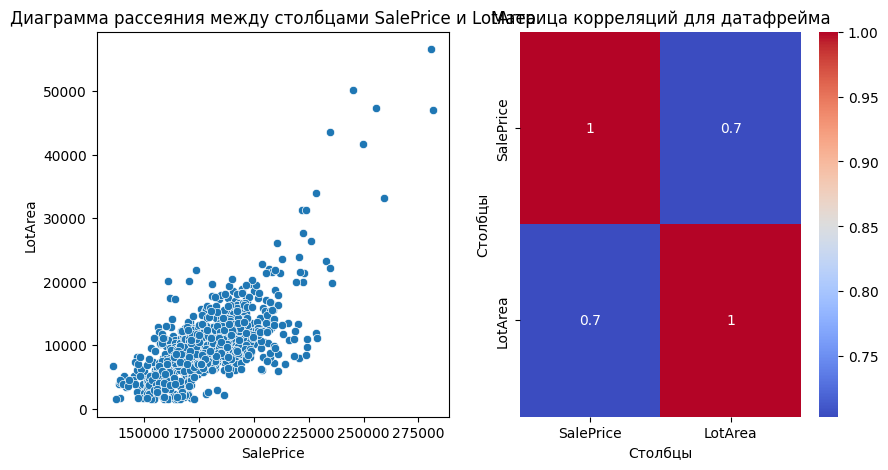

In [24]:
# Визуализируем корреляцию в графиках и диаграммах с помощью библиотек matplotlib и seaborn

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# На первом подграфике рисуем диаграмму рассеяния между столбцами
sns.scatterplot(x='SalePrice', y='LotArea', data=corr_df, ax=ax1)
# Добавляем заголовок и подписи осей
ax1.set_title("Диаграмма рассеяния между столбцами " + 'SalePrice' + " и " + 'LotArea')
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('LotArea')

# На втором подграфике рисуем матрицу корреляций для всего датафрейма
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', ax=ax2)
# Добавляем заголовок и подписи осей
ax2.set_title("Матрица корреляций для датафрейма")
ax2.set_xlabel("Столбцы")
ax2.set_ylabel("Столбцы")

# Показываем фигуру
plt.show()

Создадим и добавим в датасет новую характеристику общая площадь дома путём сложения нескольких столбцов

In [25]:
# Создаем новый столбец путем сложения данных из трех столбцов с помощью метода sum
df['total_house_area'] = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].sum(axis=1)
print("Датфрейм с указанием общей площади дома:")
print(df)

Датфрейм с указанием общей площади дома:
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0     1461          20       RH    11622   Pave      Reg         Lvl   
1     1462          20       RL    14267   Pave      IR1         Lvl   
2     1463          60       RL    13830   Pave      IR1         Lvl   
3     1464          60       RL     9978   Pave      IR1         Lvl   
4     1465         120       RL     5005   Pave      IR1         HLS   
...    ...         ...      ...      ...    ...      ...         ...   
1454  2915         160       RM     1936   Pave      Reg         Lvl   
1455  2916         160       RM     1894   Pave      Reg         Lvl   
1456  2917          20       RL    20000   Pave      Reg         Lvl   
1457  2918          85       RL    10441   Pave      Reg         Lvl   
1458  2919          60       RL     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  \
0       AllPub    In

In [26]:
df['total_house_area']

0       1778.0
1       2658.0
2       2557.0
3       2530.0
4       2560.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: total_house_area, Length: 1357, dtype: float64

In [28]:
# Сохраним датасет в файл csv
filename = 'cleaned_house_prices.csv'
path = 'E:/repo/data_gathering/hw8/'

df.to_csv(path + filename, index=False)
print("Датафрейм сохранен в файл", filename, "по пути", path)

Датафрейм сохранен в файл cleaned_house_prices.csv по пути E:/repo/data_gathering/hw8/
